In [5]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
emply_data=pd.read_csv('C:/Users/Admin/Desktop/employee_data.csv')
print(emply_data.head())
print(emply_data.isnull().sum())
print(emply_data.describe())



   ID Gender  Experience (Years)               Position  Salary
0   1      F                   4        DevOps Engineer  109976
1   2      M                   6        DevOps Engineer  120088
2   3      M                  17          Web Developer  181301
3   4      M                   7  Systems Administrator   77530
4   5      F                  13  Systems Administrator  152397
ID                    0
Gender                0
Experience (Years)    0
Position              0
Salary                0
dtype: int64
               ID  Experience (Years)        Salary
count  400.000000          400.000000     400.00000
mean   200.500000            9.670000  131701.19750
std    115.614301            6.101571   43351.50899
min      1.000000            0.000000   43643.00000
25%    100.750000            4.000000  100484.75000
50%    200.500000           10.000000  128561.50000
75%    300.250000           15.000000  157735.00000
max    400.000000           20.000000  269950.00000


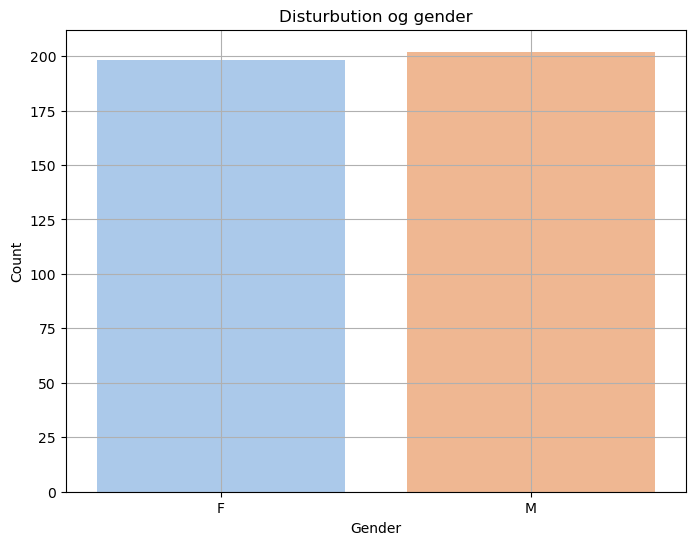

In [6]:
plt.figure(figsize=(8,6))
sns.countplot(data=emply_data,x='Gender', palette='pastel')
plt.title("Disturbution og gender")
plt.xlabel("Gender")
plt.ylabel("counts")
plt.grid(True)
plt.show()


c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


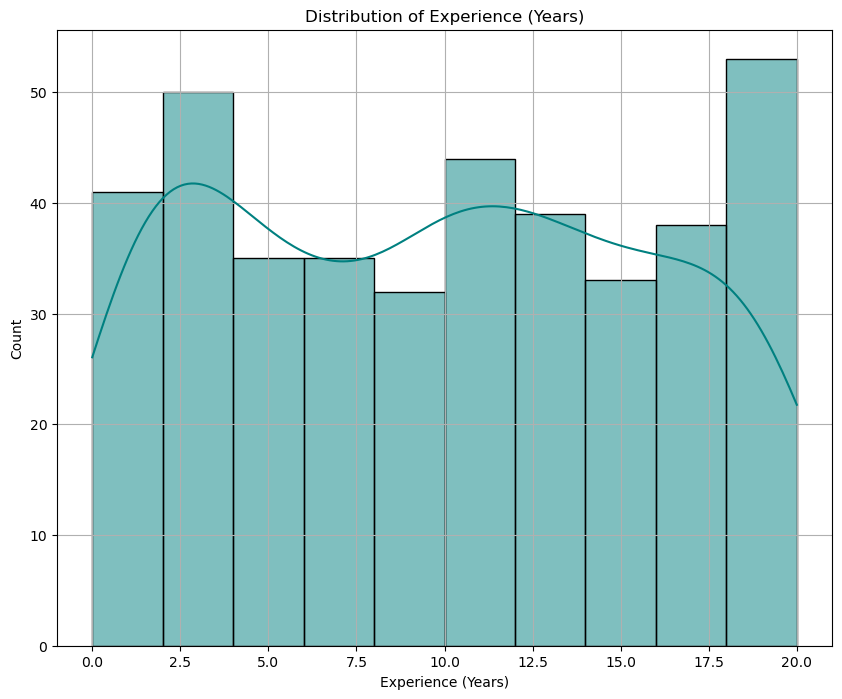

In [7]:
plt.figure(figsize=(10,8))
sns.histplot(data=emply_data,x='Experience (Years)',bins=10,kde=True, color='teal')
plt.title('Distribution of Experience (Years)')
plt.xlabel('Experience (Years)')
plt.ylabel('Count')
plt.grid(True)
plt.show()


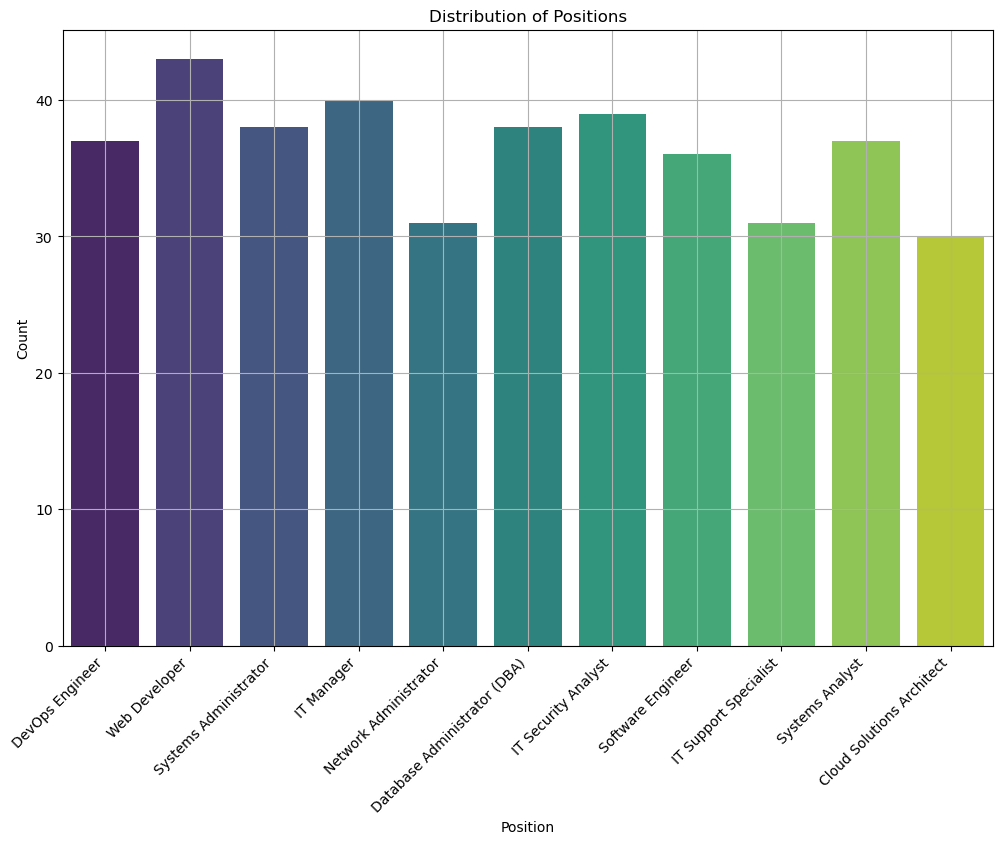

In [11]:
plt.figure(figsize=(12, 8))
sns.countplot(data=emply_data, x='Position', palette='viridis')
plt.title('Distribution of Positions')
plt.xlabel('Position')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


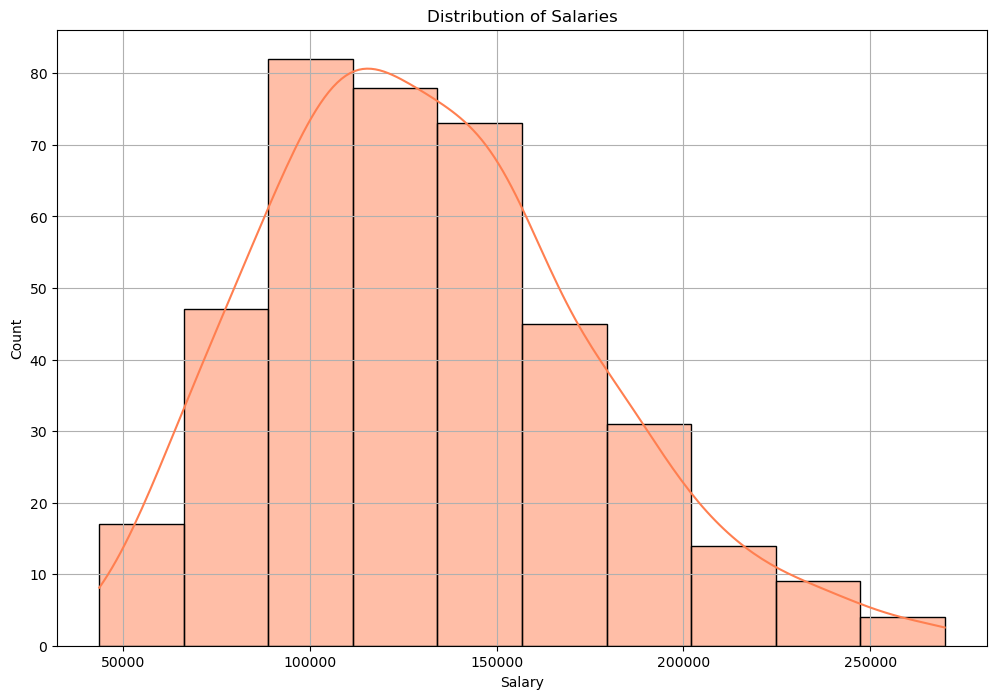

In [12]:
plt.figure(figsize=(12, 8))
sns.histplot(data=emply_data, x='Salary', bins=10, kde=True, color='coral')
plt.title('Distribution of Salaries')
plt.xlabel('Salary')
plt.ylabel('Count')
plt.grid(True)
plt.show()

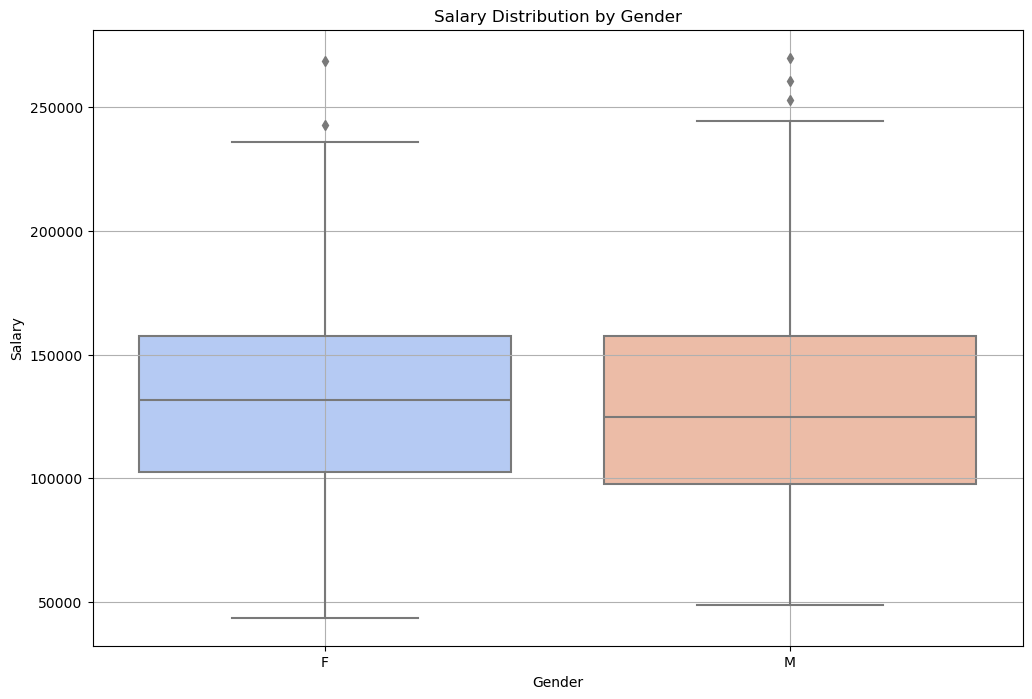

In [13]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=emply_data, x='Gender', y='Salary', palette='coolwarm')
plt.title('Salary Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


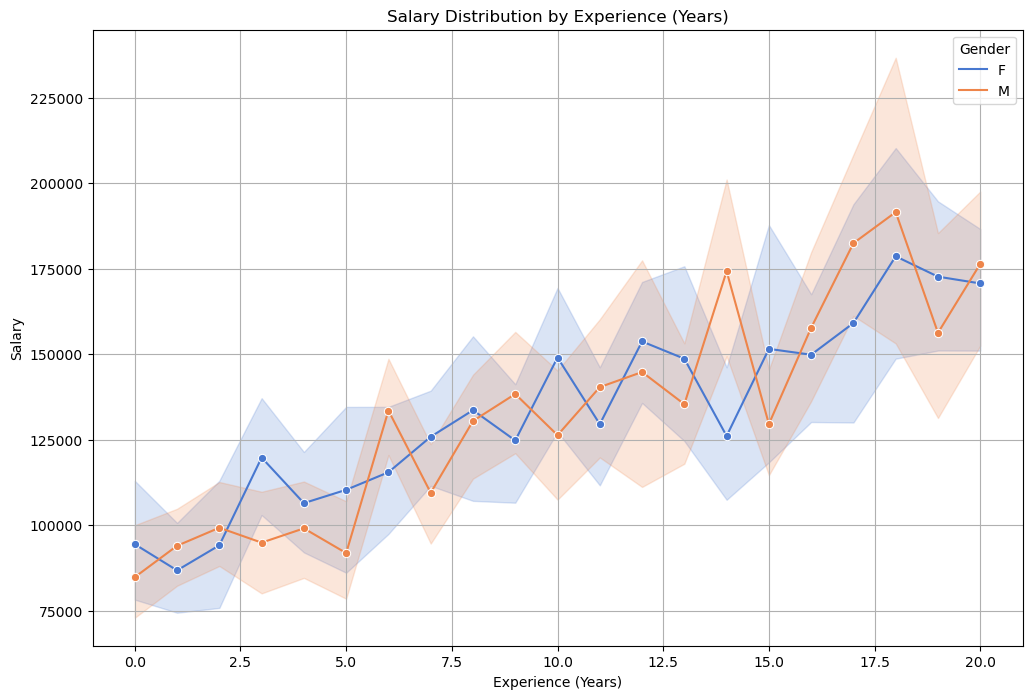

In [15]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=emply_data, x='Experience (Years)', y='Salary', hue='Gender', marker='o', palette='muted')
plt.title('Salary Distribution by Experience (Years)')
plt.xlabel('Experience (Years)')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

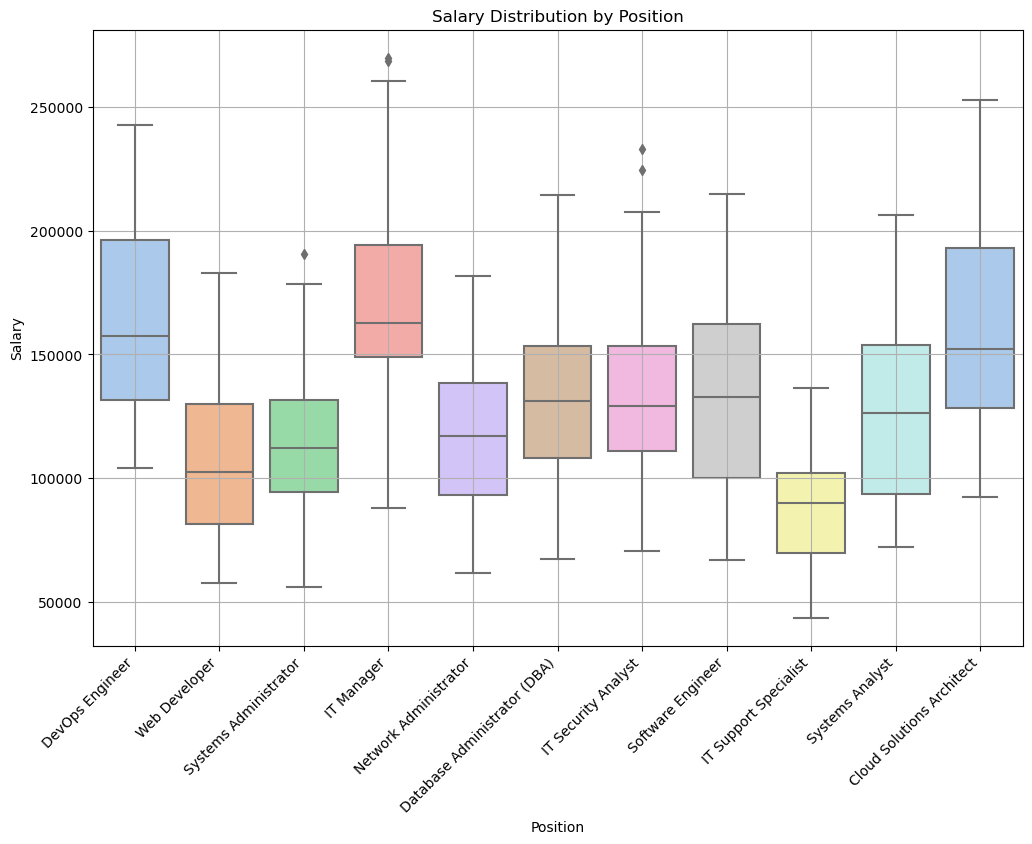

In [16]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=emply_data, x='Position', y='Salary', palette='pastel')
plt.title('Salary Distribution by Position')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

In [18]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
emply_data['Position'] = label_encoder.fit_transform(emply_data['Position'])
emply_data['Gender'] = label_encoder.fit_transform(emply_data['Gender'])
emply_data

,ID,Gender,Experience (Years),Position,Salary
0,1,0,4,2,109976
1,2,1,6,2,120088
2,3,1,17,10,181301
3,4,1,7,8,77530
4,5,0,13,8,152397
...,...,...,...,...,...
395,396,0,19,0,236045
396,397,0,20,10,182770
397,398,0,9,6,85550
398,399,1,18,1,129996


In [20]:
from sklearn.model_selection import train_test_split
x = emply_data.iloc[:,1:4]
print(x)
y=emply_data.iloc[:,-1]
print(y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

     Gender  Experience (Years)  Position
0         0                   4         2
1         1                   6         2
2         1                  17        10
3         1                   7         8
4         0                  13         8
..      ...                 ...       ...
395       0                  19         0
396       0                  20        10
397       0                   9         6
398       1                  18         1
399       0                  11         4

[400 rows x 3 columns]
0      109976
1      120088
2      181301
3       77530
4      152397
        ...  
395    236045
396    182770
397     85550
398    129996
399    169058
Name: Salary, Length: 400, dtype: int64


In [23]:
from sklearn.ensemble import RandomForestClassifier
Model = RandomForestClassifier(n_estimators=100,random_state=1)
Model.fit(x,y)
y_pred = Model.predict(x_test)
Model.score(x_test,y_test)

0.7375

In [24]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
mse

345810790.7625

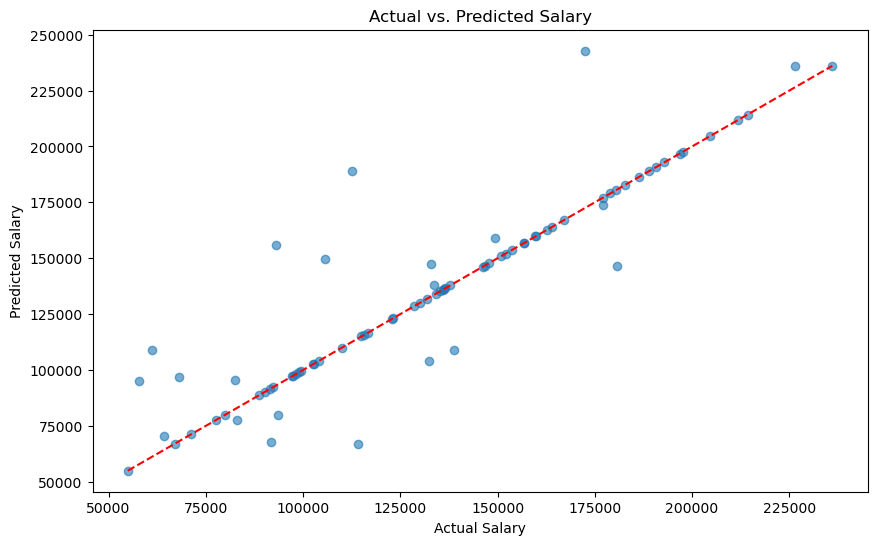

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs. Predicted Salary')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()


c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


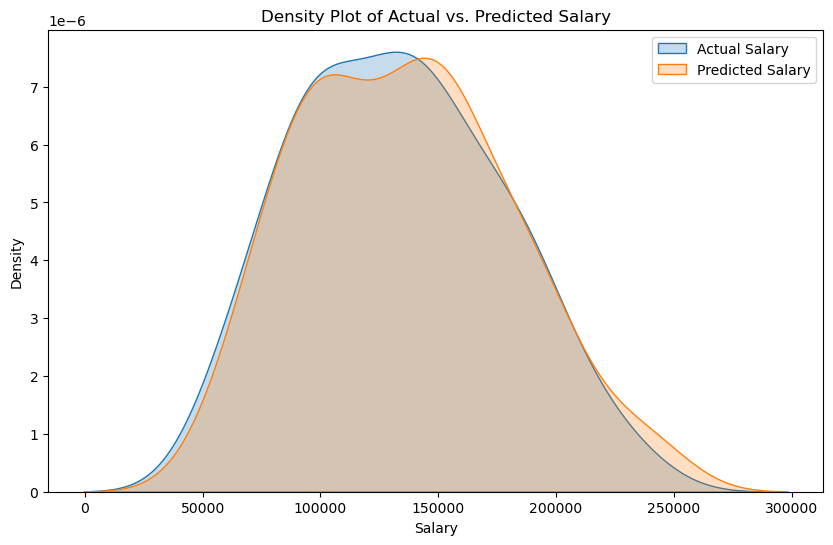

In [26]:
plt.figure(figsize=(10, 6))
sns.kdeplot(y_test, label='Actual Salary', fill=True)
sns.kdeplot(y_pred, label='Predicted Salary', fill=True)
plt.xlabel('Salary')
plt.ylabel('Density')
plt.title('Density Plot of Actual vs. Predicted Salary')
plt.legend()
plt.show()